# Foreign Interest Rate shock - Further comments

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt share of HtM households](#toc3_1_)    
    - 3.1.1. [Effect on bequest and savings](#toc3_1_1_)    
    - 3.1.2. [Effect on consumption](#toc3_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') 

**Unpack namespaces:**

In [3]:
par = model.par                
ss = model.ss                  
sol = model.sol                

**Define sensitivity parameter and values:**

In [4]:
parameter = 'Lambda'                                                     # set parameter 
parvalues = [0.,0.25,0.5]                                                # set parameter values
models = model.multi_model(parameter,parvalues)                          # create one model for each value

Jacobian calculated in 1.0 mins 2 secs
Jacobian calculated in 26.7 secs
Jacobian calculated in 27.0 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                 # length of shock
persistence = 0.80**np.arange(Tshock)                       # persistence of shock 

In [6]:
for model_ in models:

    model_.set_exo_ss()                                                                       
    model_.set_unknowns_ss()                                                                  
    model_.sol.r_hh[:Tshock] = model_.ss.r_hh*(1 + 0.01*persistence)        # shock to foreign interest rate
    model_.find_IRF()                                                   

initial:
t1-t0 = 0.01297 secs
it = 2
    max. abs. error = 9.69e-12
    7.45e-12 in A_R_ini_error
    2.70e-12 in Aq_diff
    5.77e-15 in FOC_capital_agency
    2.49e-13 in FOC_K_ell
    9.69e-12 in mkt_clearing
    6.33e-14 in PC

solve: t1-t0 = 0.08378 secs
evaluate + update: t3-t2 = 0.04687 secs
initial:
t1-t0 = 0.01097 secs
it = 2
    max. abs. error = 5.66e-12
    5.66e-12 in A_R_ini_error
    1.31e-12 in Aq_diff
    2.89e-15 in FOC_capital_agency
    1.86e-13 in FOC_K_ell
    4.85e-12 in mkt_clearing
    3.56e-14 in PC

solve: t1-t0 = 0.08278 secs
evaluate + update: t3-t2 = 0.04687 secs
initial:
t1-t0 = 0.01097 secs
it = 2
    max. abs. error = 4.36e-12
    4.36e-12 in A_R_ini_error
    4.60e-13 in Aq_diff
    2.44e-15 in FOC_capital_agency
    2.13e-13 in FOC_K_ell
    2.88e-12 in mkt_clearing
    3.32e-14 in PC

solve: t1-t0 = 0.08477 secs
evaluate + update: t3-t2 = 0.04588 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt share of HtM households](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on bequest and savings](#toc0_)

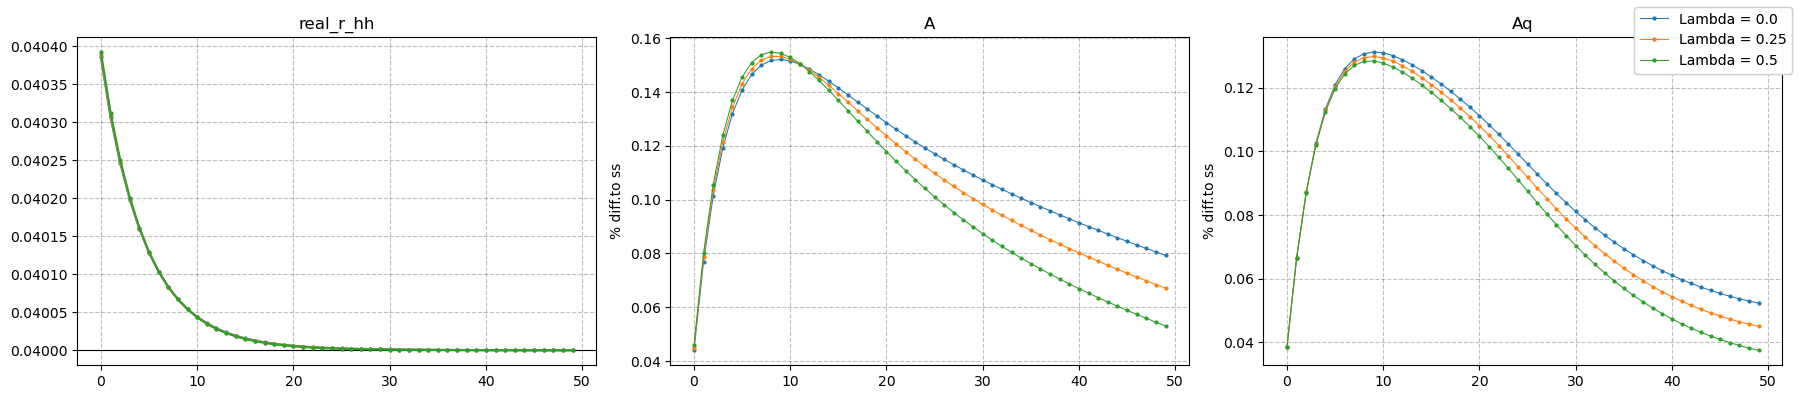

In [7]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on consumption](#toc0_)

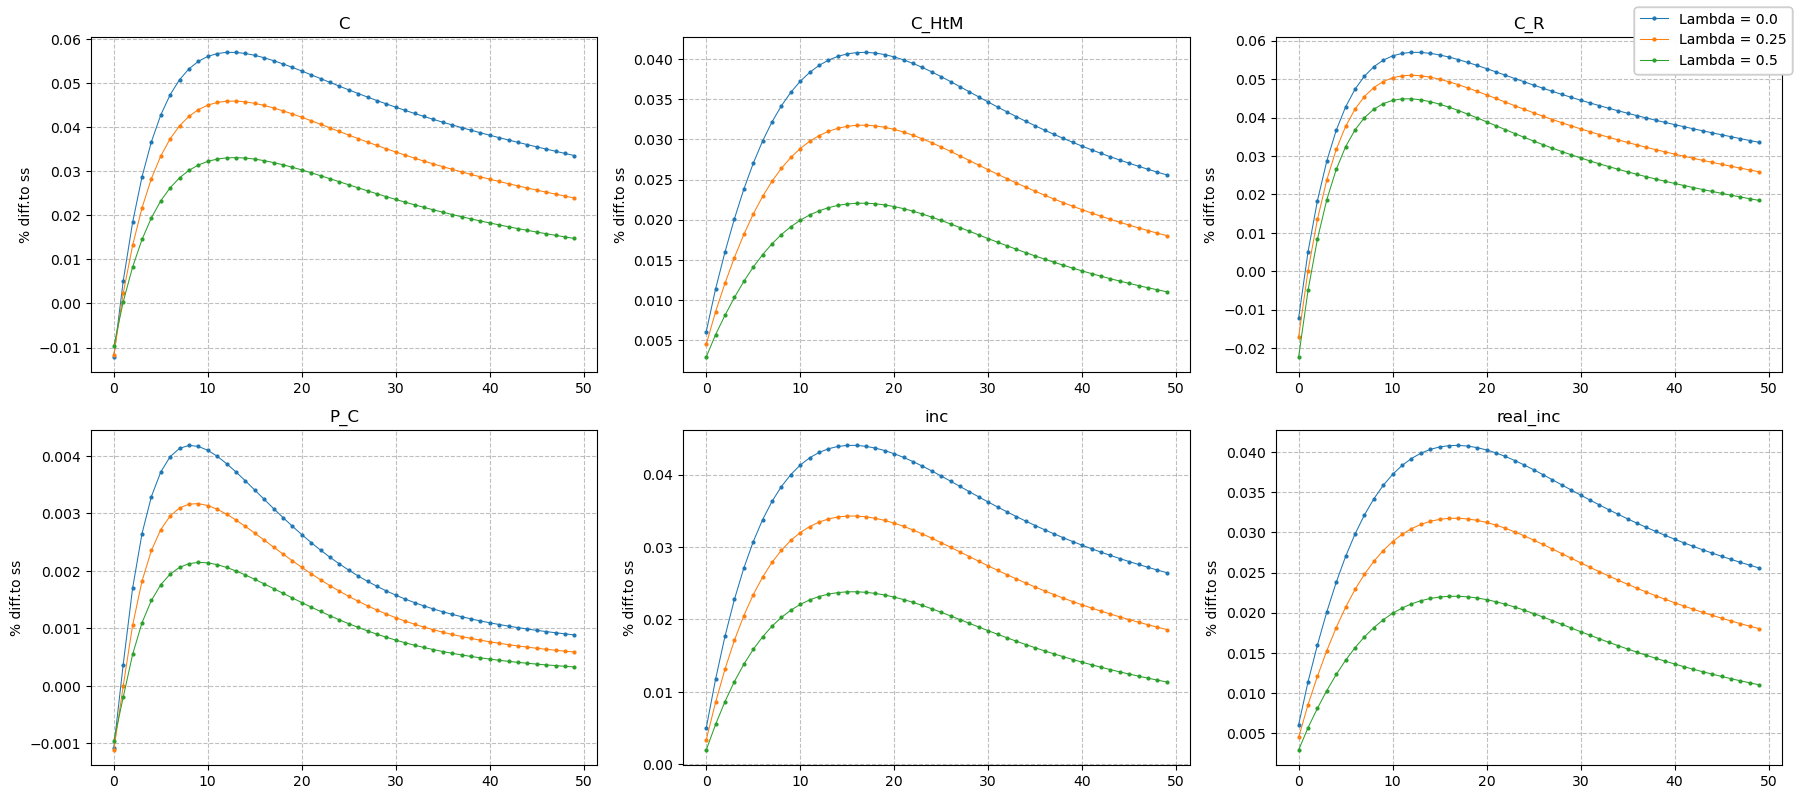

In [8]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3)